In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = 'drive/MyDrive/COMP_642_Project/Data/fer2013.csv'

In [5]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv(path)
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [7]:
data.shape

(35887, 3)

In [8]:
data.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt

### **Information about dataset**

Each image in FER-2013 is labelled as one of seven emotions, such as happy, sad, angry, afraid, surprise, disgust, and neutral, with happy being the most prevalent emotion, providing a baseline for random guessing of 24.4%.

The labels are 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral.

In [10]:
emotion_key = {0: 'Angry', 1: 'Disgust', 2: 'Fear',
               3: 'Happy', 4: 'Sad', 5: 'Surprise',
               6: 'Neutral'}

### Data PreProcessing

In [11]:
# We try to get a distribution of emotions in the dataset
x_data = data['pixels']
y_data = data['emotion']

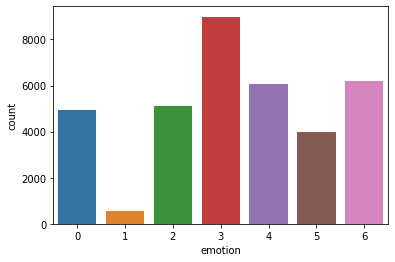

In [12]:
ax = sns.countplot(x='emotion', data=data)

In [13]:
data.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

We will use publiTest data points for validation and the privatetest data points for testing.

In [14]:
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [15]:
data.groupby(['emotion', 'Usage']).count()

pixels
emotion Usage              
0       PrivateTest     491
        PublicTest      467
        Training       3995
1       PrivateTest      55
        PublicTest       56
        Training        436
2       PrivateTest     528
        PublicTest      496
        Training       4097
3       PrivateTest     879
        PublicTest      895
        Training       7215
4       PrivateTest     594
        PublicTest      653
        Training       4830
5       PrivateTest     416
        PublicTest      415
        Training       3171
6       PrivateTest     626
        PublicTest      607
        Training       4965

The dataframe above shows that the data is imbalanced so we will need to handle the imbalanced data but first we need to convert the pixels from strings to floats.

In [16]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [17]:
# Convert pixels to floats (still flattened)
x_data = np.array(list(map(str.split, x_data)), np.float32)

In [18]:
# Normalize the pixels
x_data = x_data / 255

In [19]:
# We reshape the array from a flattened vector to its original format: 48 x 48 x 1
# channel since it is a single channel image
x_data = x_data.reshape(-1, 48, 48, 1)

In [20]:
x_data.shape

(35887, 48, 48, 1)

In [21]:
x_data[0].shape

(48, 48, 1)

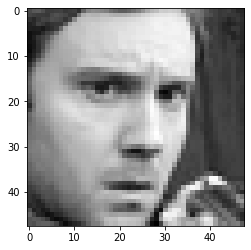

In [36]:
# To show the images, we use the np.squeeze function for the single channel image 
# to be displayed by matplotlib
# https://stackoverflow.com/questions/59601024/matplotlib-cant-plot-single-channel-or-greyscale-image-pixels

plt.imshow(x_data[0].squeeze(axis=2), cmap='gray')